In [1]:
#!pip3 install  scikit
import skimage
import os
from skimage import io
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
import pathlib

# 

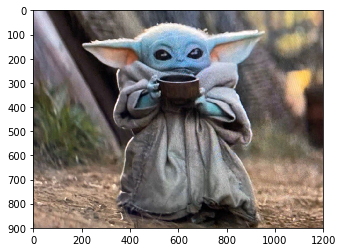

In [2]:
filename = os.path.join(skimage.data_dir, '/root/Documents/Deeplearning/Numpy-CNN-master/CNN/im1.jpeg')
img = io.imread(filename)
plt.imshow(img)
plt.show()


In [3]:

def transform(img,x,y):
    new_img = resize(img, (x,y))
    rgb_weights =np.array( [0.2989, 0.5870, 0.1140] )
    new_img=np.dot(new_img, rgb_weights)
    return(new_img)


In [4]:
def load_dataset(path,h,w):
    train = pathlib.Path(path)
    k=list(train.glob('*'))
    x=[]
    y=[]
    for i in range(len(k)):
        if(i==0):
            y_y=[1,0]
        else:
            y_y=[0,1]
        pp=pathlib.Path(k[i])
        x_x=list(pp.glob('*'))
        for data in x_x:
            x.append(transform(io.imread(data),h,w))#Transforming the image into greyscale and resizing it to h*w size
            y.append(y_y)

    
    return(x,y)


In [5]:
def flatten(train):
    for k in range(len(train)):
        train[k]=(train[k].flatten()).reshape(1,len(train[k].flatten()))
    return(train)

In [22]:
def sigmoid(x):
    return(1/(1 + np.exp(-x))) 


def f_forward(x,w1,w2,w3):
#     print(w1.shape,w2.shape,w3.shape)
    # hiden layer
    
    z1=x.dot(w1)# input from layer 1
#     print(
    a1=sigmoid(z1)# out put of layer 2 
#     print(a1)
    z2=a1.dot(w2)# input from layer 2 
#     print(z2)
    a2=sigmoid(z2)# out put of layer 3 
#     print(a2)
    # Output layer
    z3=a2.dot(w3)#input of out layer
#     print(z1)
    a3=sigmoid(z3)#output of out layer
#     print(a3)
    return(a3)

#random weight generator
def generate_wt(x,y):
    return(np.array(np.random.randn(x*y)).reshape(x,y))

# mean square error as loss function
def loss(out,Y):
    s=(np.square(out-Y))
    s=np.sum(s)/len(Y)
    return(s)


def back_prop(x,y,w1,w2,w3,alpha):
    
    # hiden layer
    z1=x.dot(w1)# input from layer 1 
    a1=sigmoid(z1)# out put of layer 2 
    
    z2=a1.dot(w2)# input from layer 2 
    a2=sigmoid(z2)# out put of layer 3 

    # Output layer
    z3=a2.dot(w3)#input of out layer
    a3=sigmoid(z3)#output of out layer
    
    
    #error in each layer by back propagation
    d3=(a3-y)
    d2=np.multiply((w3.dot((d3.transpose()))).transpose(),(np.multiply(a2,1-a2)))
    d1=np.multiply((w2.dot((d2.transpose()))).transpose(),(np.multiply(a1,1-a1)))
    
    #calculating the differentitation of the cost
    w1_adj=x.transpose().dot(d1)
    w2_adj=a1.transpose().dot(d2)
    w3_adj=a2.transpose().dot(d3)
    
    #Appling gradient descent     
    w1=w1-(alpha*(w1_adj))
    w2=w2-(alpha*(w2_adj))
    w3=w3-(alpha*(w3_adj))
    
    return(w1,w2,w3)
    

    
def train_model(x,Y,w1,w2,w3,alpha=0.01,epoch=10):
    acc=[]
    losss=[]
    for j in range(epoch):
        l=[]
        arr = np.arange(len(x))
        np.random.shuffle(arr)
        for i in arr:
            out=f_forward(x[i],w1,w2,w3)
#             print(out,Y[i],loss(out,Y[i]))
            l.append((loss(out,Y[i])))
            w1,w2,w3=back_prop(x[i],Y[i],w1,w2,w3,alpha)
        print("epochs:",j+1,"======== acc:",(1-(sum(l)/len(x)))*100)   
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc,losss,w1,w2,w3)


def pridict(x,w1,w2,w3):
    Out=f_forward(x,w1,w2,w3)
    maxm=0
    k=0
    for i in range(len(Out)):
        if(maxm<Out[i]):
            maxm=Out[i]
            k=i
    print("It is ",(1-Out[k-1])*100,"%",end=" ")
    
    if(k==0):
        print("::::YODA:::")
    elif(k==1):
        print("Darth Vader")

    
    


In [7]:
# importing the dataset and labels
train,label=load_dataset("/root/Documents/Deeplearning/Numpy-CNN-master/CNN/data/train",200,200)  


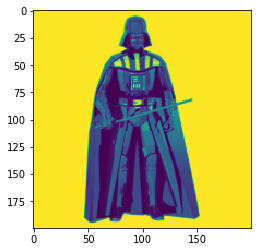

label:  [0, 1]


In [8]:
# Image in train data set of Darth Vader
plt.imshow(train[20])
plt.show()
print("label: ",label[20])

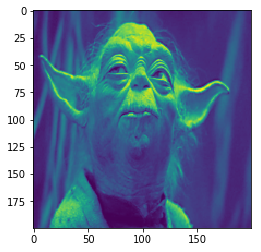

label:  [1, 0]


In [9]:
# Image in train data set of Yoda
plt.imshow(train[2])
plt.show()
print("label: ",label[2])

In [10]:

# flatting the image matrix into a vector
train=flatten(train)
train[0].shape


(1, 40000)

In [11]:
#initilizing the weights
w1=generate_wt(40000,100)
w2=generate_wt(100,50)
w3=generate_wt(50,2)

print(w1,w1.shape,"\n\n",w2.shape,"\n\n",w3.shape)

[[ 0.08897077 -0.39963589 -0.68850381 ...  1.45342819 -0.22022985
  -0.76121151]
 [-0.02164069  0.73321227  0.27168372 ... -0.91638183 -0.24514438
   2.22097745]
 [ 1.10881514 -0.28420619  0.74170373 ... -2.54378434 -1.44428017
   0.93906682]
 ...
 [-0.61913381  0.96488039  1.38649355 ...  0.67582702 -0.07613103
   0.7108169 ]
 [-1.24687028 -1.71295013 -0.36453798 ... -0.67529922  0.03308987
  -0.47265809]
 [ 0.51439526 -0.0729365  -0.23498417 ...  0.37773968  0.64877685
  -1.41272502]] (40000, 100) 

 (100, 50) 

 (50, 2)


In [12]:
# Tranning the model with learning rate 0.01 and 50 epochs
acc,losss,w1,w2,w3=train_model(train,label,w1,w2,w3,0.01,50)

epochs: 1 ======== acc: 56.70050355599958
epochs: 2 ======== acc: 70.99150392049746
epochs: 3 ======== acc: 77.64505930064902
epochs: 4 ======== acc: 81.46172373275114
epochs: 5 ======== acc: 83.3964457850279
epochs: 6 ======== acc: 85.61561510807894
epochs: 7 ======== acc: 86.62582033778665
epochs: 8 ======== acc: 87.7617381025191
epochs: 9 ======== acc: 88.88047399342219
epochs: 10 ======== acc: 89.78605584618707
epochs: 11 ======== acc: 89.88695888600995
epochs: 12 ======== acc: 91.06197125284552
epochs: 13 ======== acc: 91.31281230372225
epochs: 14 ======== acc: 91.79500313097853
epochs: 15 ======== acc: 92.17795397180821
epochs: 16 ======== acc: 92.31939964753354
epochs: 17 ======== acc: 93.32039638778498
epochs: 18 ======== acc: 93.45066645276626
epochs: 19 ======== acc: 94.0852998016935
epochs: 20 ======== acc: 94.34454461325971
epochs: 21 ======== acc: 94.56472341731455
epochs: 22 ======== acc: 94.81543306993659
epochs: 23 ======== acc: 95.28219156294358
epochs: 24 ======== acc

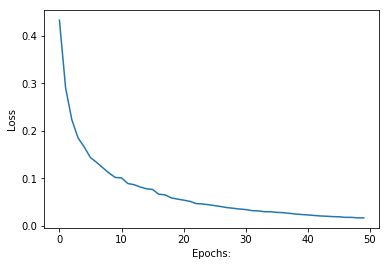

In [13]:
# plotting loss
plt.plot(losss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()


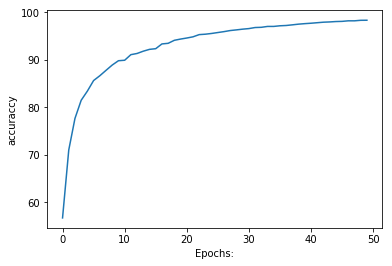

In [14]:
# plotting accuraccy
plt.plot(acc)
plt.ylabel('accuraccy')
plt.xlabel("Epochs:")
plt.show()

In [15]:
# importing the test data
t = pathlib.Path("/root/Documents/Deeplearning/Numpy-CNN-master/CNN/data/test")
k=list(t.glob('*'))
test=[]
for img in k:
    test.append(io.imread(img))
   


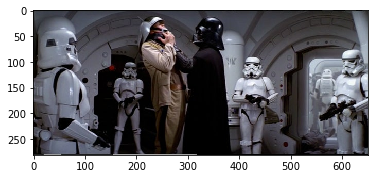

It is  97.12422041403757 % Darth Vader


In [58]:
# Now its pridiction time !!!!!!!
import time
from IPython.display import clear_output
for x in range(10):
    i=np.random.randint(len(test))
    plt.imshow(test[i])
    plt.show()    
    pridict(flatten(transform(test[i],200,200)).flatten(),w1,w2,w3)
    time.sleep(2)
    clear_output(wait=True)